### Форін Дмитро, Спекторовська Лада, КА-24. Варіант №11

In [1]:
from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import SpectralClustering
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances, adjusted_rand_score, silhouette_score, davies_bouldin_score, normalized_mutual_info_score

### 1) Представити початковi данi графiчно.

In [2]:
n_samples_1=1000
n_samples_2=700
centers=[[0.0,0.0],[3.5,3.5]]
clusters_std=[1.5,0.5]
X,y = make_blobs(n_samples=[n_samples_1, n_samples_2], centers=centers, cluster_std=clusters_std, random_state=0, shuffle=False)

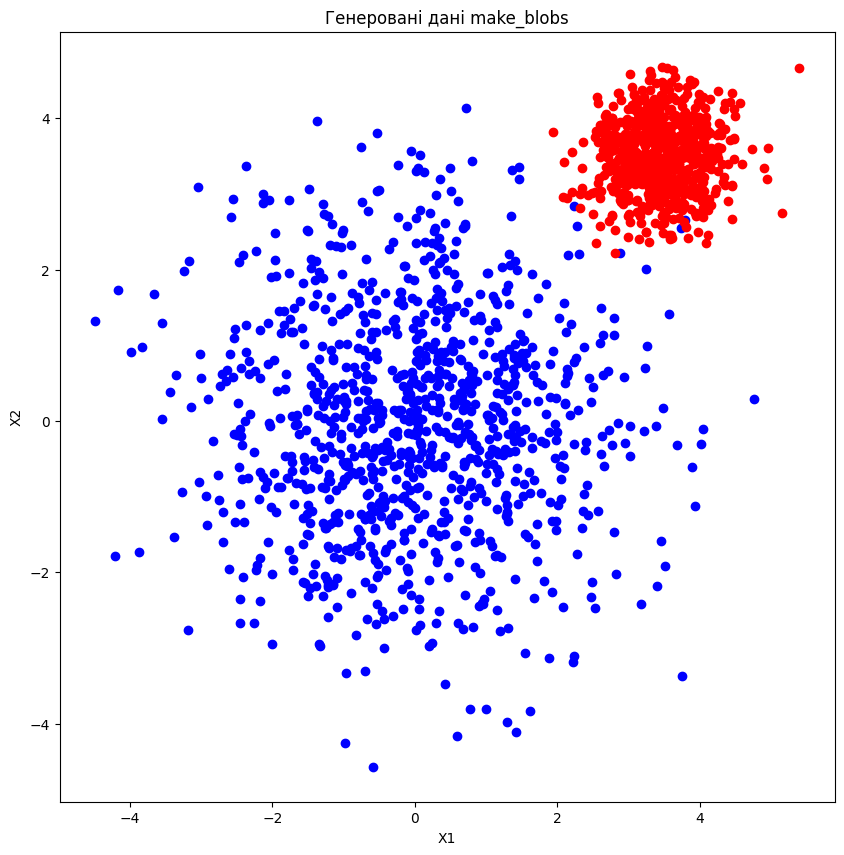

In [18]:
plt.figure(figsize=(10,10))
plt.scatter(X[y==0,0],X[y==0,1], color='blue', label='class 0')
plt.scatter(X[y==1,0],X[y==1,1], color='red', label='class 1')
#plt.scatter(X[:, 0], X[:, 1], c=y, cmap='tab10')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Генеровані дані make_blobs')
plt.show()

### 2) Побудувати модель кластеризацiї згiдно з варiантом.
### 3) Виконати кластеризацiю даних на основi моделi

In [4]:
spectral_clustering = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', n_neighbors=10, random_state=0)
y_pred = spectral_clustering.fit_predict(X)

### 4) Представити розбиття на кластери графiчно, наприклад, рiзними кольорами.

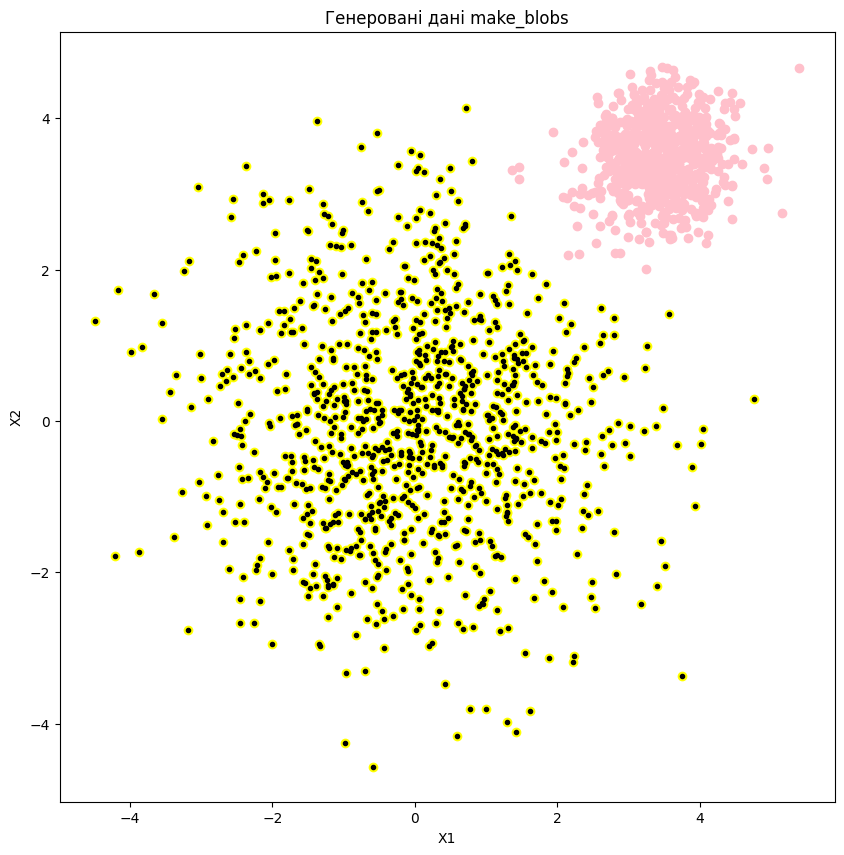

In [5]:
plt.figure(figsize=(10,10))
plt.scatter(X[y_pred==0,0],X[y_pred==0,1], color='pink', label='class 0')
plt.scatter(X[y_pred==1,0],X[y_pred==1,1], color='yellow', label='class 1')
#plt.scatter(X[:, 0], X[:, 1], c=y, cmap='tab10')
plt.scatter(X[y_pred==1,0],X[y_pred==1,1], marker='.', color='black')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Генеровані дані make_blobs')
plt.show()

### 5) Розрахувати час кластеризацiї. Оцiнити швидкодiю методу на надвеликих наборах даних (наприклад, при збiльшеннi кiлькостi точок даних доста тисяч i бiльше).

In [6]:
n_samples_list = [100, 500, 1000, 2000, 5000, 10000, 50000,100000]
times=[]
for i in n_samples_list:
    X1,_ = make_blobs(n_samples=i, centers=centers, cluster_std=clusters_std, random_state=0, shuffle=False)
    spectral_clustering_emp = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', n_neighbors=10, random_state=0)
    start_time = time.time()
    spectral_clustering.fit_predict(X1)
    end_time = time.time()
    times.append(end_time-start_time)
print(times)

[0.03709578514099121, 0.07018065452575684, 0.07864785194396973, 0.14218735694885254, 0.5943422317504883, 2.3233492374420166, 61.135000467300415, 238.72457003593445]


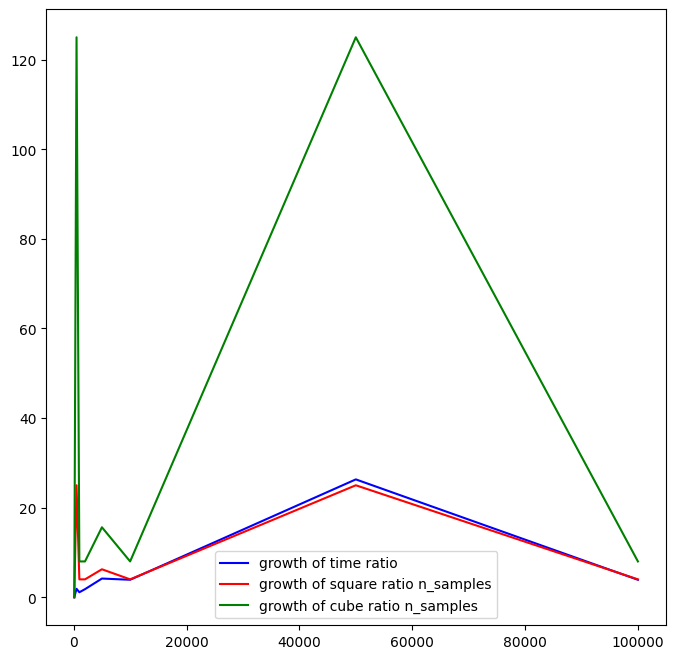

In [7]:
samples_ratio=[0]
time_ratio=[0]
for i in range (0,7):
    samples_ratio.append(n_samples_list[i+1]/n_samples_list[i])
    time_ratio.append(times[i+1]/times[i])
res=[]
res1=[]
for i in samples_ratio:
    res.append(i**2)
    res1.append(i**3)
plt.figure(figsize=(8,8))
plt.plot(n_samples_list, time_ratio, color='blue', label='growth of time ratio')
plt.plot(n_samples_list, res, color='red', label='growth of square ratio n_samples')
plt.plot(n_samples_list, res1, color='green', label='growth of cube ratio n_samples')
plt.legend()
plt.show()



### Отже при надвеликих обсягах даних можна вважати що алгоритм має складність O(n^2)

### 6) Побудувати кiлька альтернативних моделей:

• шляхом змiни значень параметрiв основної моделi

• використати рiзнi функцiї вiдстанi в алгоритмах, де це можна зро-
бити,

• задати рiзнi значення кiлькостi кластерiв, в алгоритмах де кiлькiсть
кластерiв - параметр.

In [8]:
model_n5 = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', n_neighbors=5, random_state=0)
model_n15 = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', n_neighbors=15, random_state=0)
model_c3 = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', n_neighbors=10, random_state=0)
model_c6 = SpectralClustering(n_clusters=6, affinity='nearest_neighbors', n_neighbors=10, random_state=0)
model_rbf = SpectralClustering(n_clusters=2, affinity='rbf', random_state=0)
matrix = pairwise_distances(X, metric='cosine')
model_prec = SpectralClustering(n_clusters=2, affinity='precomputed', n_neighbors=10, random_state=0)

In [9]:
y_n5_pred=model_n5.fit_predict(X)
y_n15_pred=model_n15.fit_predict(X)
y_c3_pred=model_c3.fit_predict(X)
y_c6_pred=model_c6.fit_predict(X)
y_rbf_pred=model_rbf.fit_predict(X)
y_prec_pred=model_prec.fit_predict(matrix)

### 7) Для кожної альтернативної моделi розрахувати метрики якостi кластеризацiї, що реалiзованi в модулi sklearn.metrics:
• Estimated Number of Clusters.
• Adjusted Rand Index.
• Silhouette Coefficient.
• Davies-Bouldin index.

In [10]:
estimated_clusters = len(set(y_n5_pred))
print("Estimated number of clusters neighbours=5 : ",estimated_clusters)
estimated_clusters = len(set(y_n15_pred))
print("Estimated number of clusters neighbours=15 : ",estimated_clusters)
estimated_clusters = len(set(y_c3_pred))
print("Estimated number of clusters clusters=3 : ",estimated_clusters)
estimated_clusters = len(set(y_c6_pred))
print("Estimated number of clusters clusters=6 : ",estimated_clusters)
estimated_clusters = len(set(y_rbf_pred))
print("Estimated number of clusters rbf : ",estimated_clusters)
estimated_clusters = len(set(y_prec_pred))
print("Estimated number of clusters precomputed : ",estimated_clusters)
estimated_clusters = len(set(y_pred))
print("Estimated number of clusters precomputed : ",estimated_clusters)


Estimated number of clusters neighbours=5 :  2
Estimated number of clusters neighbours=15 :  2
Estimated number of clusters clusters=3 :  3
Estimated number of clusters clusters=6 :  6
Estimated number of clusters rbf :  2
Estimated number of clusters precomputed :  2
Estimated number of clusters precomputed :  2


In [11]:
print("Adjusted Rand Index neighbours=5 : ",adjusted_rand_score(y,y_n5_pred))
print("Adjusted Rand Index neighbours=10 : ",adjusted_rand_score(y,y_pred))
print("Adjusted Rand Index neighbours=15 : ",adjusted_rand_score(y,y_n15_pred))
print("Adjusted Rand Index clusters=3 : ",adjusted_rand_score(y,y_c3_pred))
print("Adjusted Rand Index clusters=6 : ",adjusted_rand_score(y,y_c6_pred))
print("Adjusted Rand Index rbf : ",adjusted_rand_score(y,y_rbf_pred))
print("Adjusted Rand Index precomputed : ",adjusted_rand_score(y,y_prec_pred))

Adjusted Rand Index neighbours=5 :  0.9765762126151772
Adjusted Rand Index neighbours=10 :  0.9742493845540617
Adjusted Rand Index neighbours=15 :  0.9742493845540617
Adjusted Rand Index clusters=3 :  0.6428083115495468
Adjusted Rand Index clusters=6 :  0.3192537924939687
Adjusted Rand Index rbf :  0.9672858453048434
Adjusted Rand Index precomputed :  -0.00020475433186105545


### Як можна бачити індекс дуже високий у всіх випадках де робота моделі не була саботована

In [12]:
print("Silhouette Coefficient neighbours=5 : ",silhouette_score(X,y_n5_pred))
print("Silhouette Coefficient neighbours=10 : ",silhouette_score(X,y_pred))
print("Silhouette Coefficient neighbours=15 : ",silhouette_score(X,y_n15_pred))
print("Silhouette Coefficient clusters=3 : ",silhouette_score(X,y_c3_pred))
print("Silhouette Coefficient clusters=6 : ",silhouette_score(X,y_c6_pred))
print("Silhouette Coefficient rbf : ",silhouette_score(X,y_rbf_pred))
print("Silhouette Coefficient precomputed : ",silhouette_score(X,y_prec_pred))

Silhouette Coefficient neighbours=5 :  0.6207103813766621
Silhouette Coefficient neighbours=10 :  0.621181611671142
Silhouette Coefficient neighbours=15 :  0.621181611671142
Silhouette Coefficient clusters=3 :  0.5069270327129983
Silhouette Coefficient clusters=6 :  0.3299316426206534
Silhouette Coefficient rbf :  0.6222393167134289
Silhouette Coefficient precomputed :  0.04127463195006382


### Як можна бачити кластери добре розділені

In [13]:
print("Davies-Bouldin Index neighbours=5 : ",davies_bouldin_score(X,y_n5_pred))
print("Davies-Bouldin Index neighbours=10 : ",davies_bouldin_score(X,y_pred))
print("Davies-Bouldin Index neighbours=15 : ",davies_bouldin_score(X,y_n15_pred))
print("Davies-Bouldin Index clusters=3 : ",davies_bouldin_score(X,y_c3_pred))
print("Davies-Bouldin Index clusters=6 : ",davies_bouldin_score(X,y_c6_pred))
print("Davies-Bouldin Index rbf : ",davies_bouldin_score(X,y_rbf_pred))
print("Davies-Bouldin Index precomputed : ",davies_bouldin_score(X,y_prec_pred))
#https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.davies_bouldin_score.html

Davies-Bouldin Index neighbours=5 :  0.49285181072092676
Davies-Bouldin Index neighbours=10 :  0.49277568010965844
Davies-Bouldin Index neighbours=15 :  0.49277568010965844
Davies-Bouldin Index clusters=3 :  1.0004801071188076
Davies-Bouldin Index clusters=6 :  0.9350675300252345
Davies-Bouldin Index rbf :  0.49289841518631483
Davies-Bouldin Index precomputed :  2.548360520147813


### 8) Виконати аналiз результатiв кластеризацiї одним з неформальних методiв (тiльки методом згiдно з варiантом): чи є розбиття стабiльним пiсля видалення окремих об’єктiв


In [14]:
n2_samples=850
indices = np.random.choice(len(X), n2_samples, replace=False)
X2 = X [indices]
y2 = y[indices]

In [15]:
y2_pred=spectral_clustering.fit_predict(X2)

In [16]:
print(adjusted_rand_score(y2,y2_pred))

0.9765598106471551


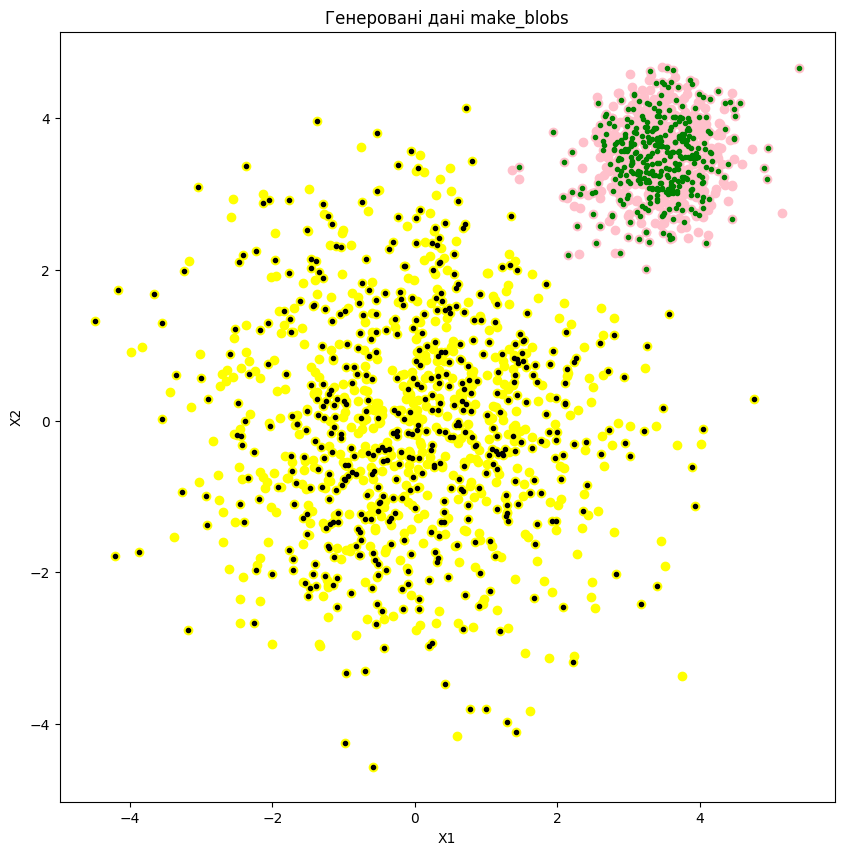

In [17]:
plt.figure(figsize=(10,10))
plt.scatter(X[y_pred==0,0],X[y_pred==0,1], color='pink', label='class 0')
plt.scatter(X[y_pred==1,0],X[y_pred==1,1], color='yellow', label='class 1')
#plt.scatter(X[:, 0], X[:, 1], c=y, cmap='tab10')
plt.scatter(X2[y2_pred==0,0],X2[y2_pred==0,1], marker='.', color='green')
plt.scatter(X2[y2_pred==1,0],X2[y2_pred==1,1], marker='.', color='black')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Генеровані дані make_blobs')
plt.show()

### Як можна бачити кластери співпадають вельми точно

### Найперша модель з параметрами: n_clusters=2, affinity='nearest_neighbors', n_neighbors=10, показала себе задовільно дуже високі показники. Зміна парметрів не призвела до значного покращення результатів. 
### Швидкодія методу більш ніж задовільна на невеликих (n_samples<=10000) вибірках, при подальшому зростанні швидкодія падає. Можна вважати що складність алгоритму O(n^2)

### Початкові дані make_circles

### 1) Представити початковi данi графiчно.

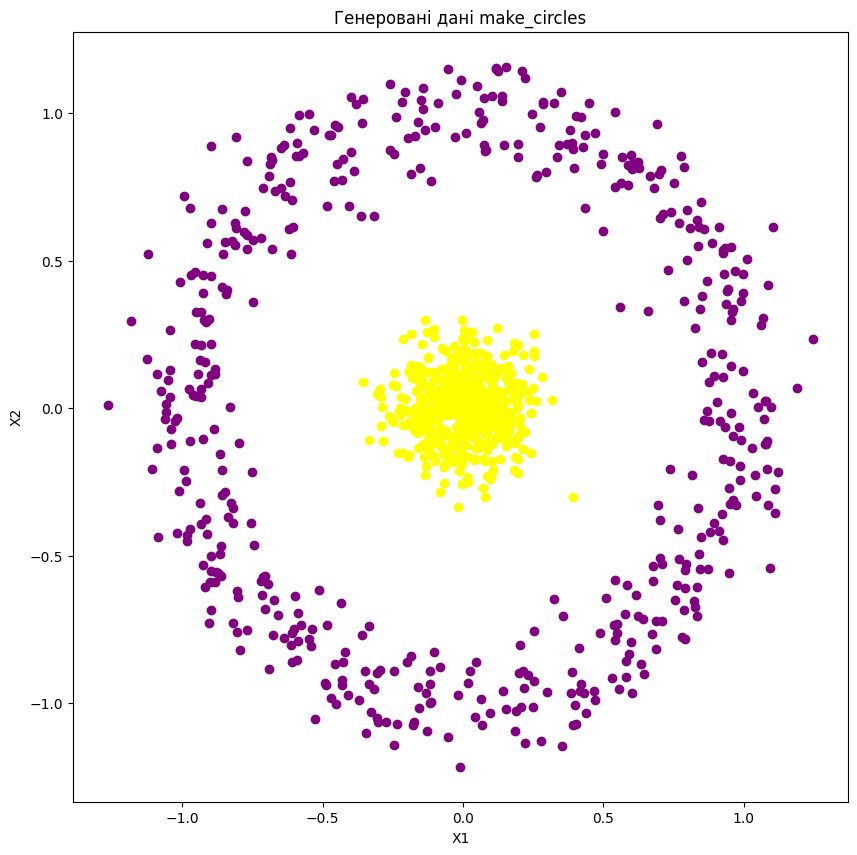

In [8]:
X, y = make_circles(n_samples=1000, factor=0.1, noise=0.1)
plt.figure(figsize=(10,10))
plt.scatter(X[y==0,0],X[y==0,1], color='purple', label='class 0')
plt.scatter(X[y==1,0],X[y==1,1], color='yellow', label='class 1')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Генеровані дані make_circles')
plt.show()

### 2) Побудувати модель кластеризацiї згiдно з варiантом.
### 3) Виконати кластеризацiю даних на основi моделi

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

spectral = SpectralClustering(n_clusters=2, affinity='rbf', random_state=0)  # Параметри можна налаштувати
y_pred = spectral.fit_predict(X_scaled)

### 4) Представити розбиття на кластери графiчно, наприклад, рiзними кольорами.

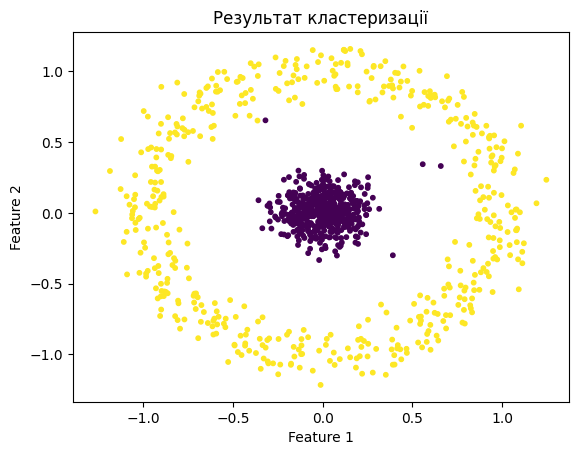

In [10]:
# Візуалізація результату
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', s=10)
plt.title("Результат кластеризації")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

### 5) Розрахувати час кластеризацiї. Оцiнити швидкодiю методу на надвеликих наборах даних (наприклад, при збiльшеннi кiлькостi точок даних до ста тисяч i бiльше).

In [4]:
n_samples_list = [100, 500, 1000, 2000, 5000, 10000, 20000]
times=[]
for i in n_samples_list:
    scaler = StandardScaler()
    X1,_ = make_circles(n_samples=i, factor=0.1, noise=0.1)
    X1_scaled = scaler.fit_transform(X1)
    spectral_emp = SpectralClustering(n_clusters=2, affinity='rbf', random_state=0)
    start_time = time.time()
    spectral_emp.fit_predict(X1_scaled)
    end_time = time.time()
    times.append(end_time-start_time)
print(times)

[0.057694435119628906, 0.15683317184448242, 0.60703444480896, 0.7959253787994385, 5.06501030921936, 25.537907361984253, 285.984575510025]


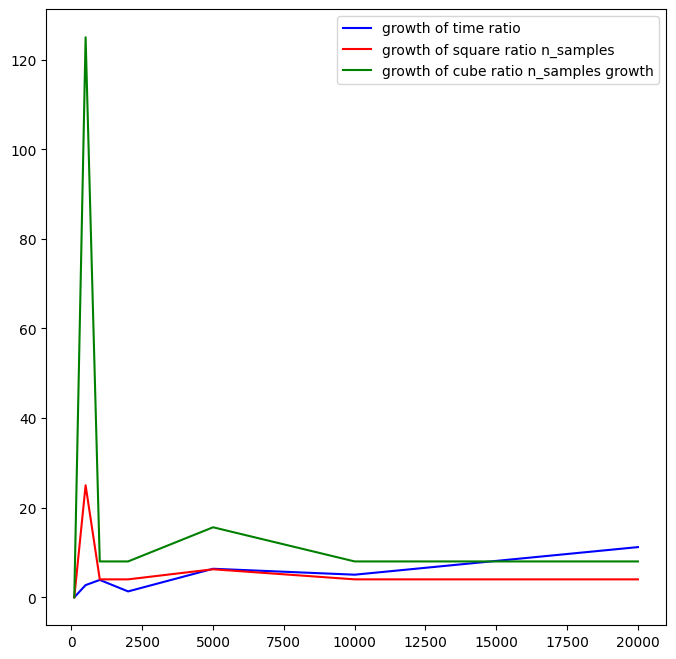

In [5]:
samples_ratio=[0]
time_ratio=[0]
for i in range (0,6):
    samples_ratio.append(n_samples_list[i+1]/n_samples_list[i])
    time_ratio.append(times[i+1]/times[i])
res=[]
res1=[]
for i in samples_ratio:
    res.append(i**2)
    res1.append(i**3)
plt.figure(figsize=(8,8))
plt.plot(n_samples_list, time_ratio, color='blue', label='growth of time ratio')
plt.plot(n_samples_list, res, color='red', label='growth of square ratio n_samples')
plt.plot(n_samples_list, res1, color='green', label='growth of cube ratio n_samples growth')
plt.legend()
plt.show()

### 6) Побудувати кiлька альтернативних моделей:

• шляхом змiни значень параметрiв основної моделi

• використати рiзнi функцiї вiдстанi в алгоритмах, де це можна зробити,

• задати рiзнi значення кiлькостi кластерiв, в алгоритмах де кiлькiсть
кластерiв - параметр.

### 7) Для кожної альтернативної моделi розрахувати метрики якостi кластеризацiї, що реалiзованi в модулi sklearn.metrics:
• Estimated Number of Clusters.

• Adjusted Rand Index.

• Silhouette Coefficient.

• Davies-Bouldin index.

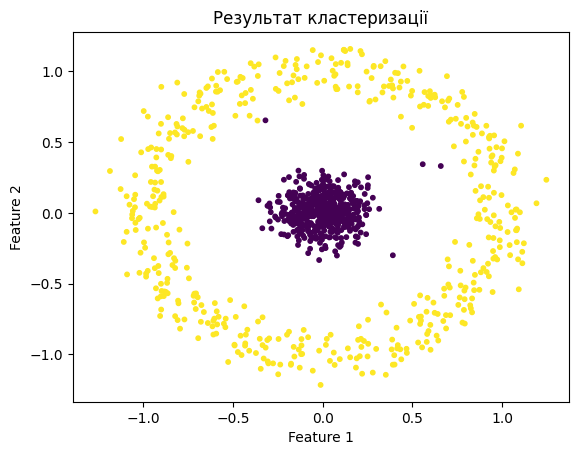


Модель 1:
Adjusted Rand Index: 0.9880
Silhouette Coefficient: 0.2878
Davies-Bouldin Index: 91.8418


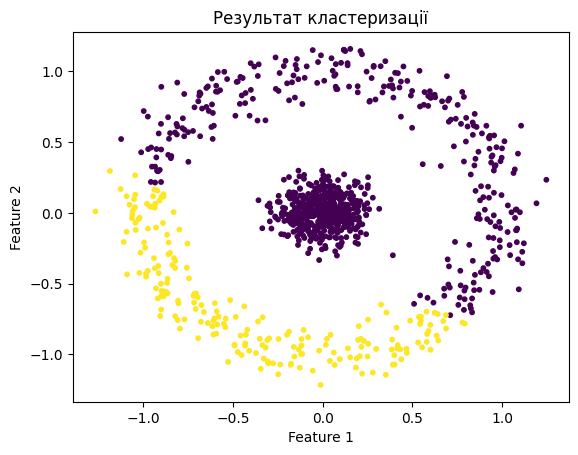


Модель 2:
Adjusted Rand Index: 0.1709
Silhouette Coefficient: 0.4182
Davies-Bouldin Index: 1.1753


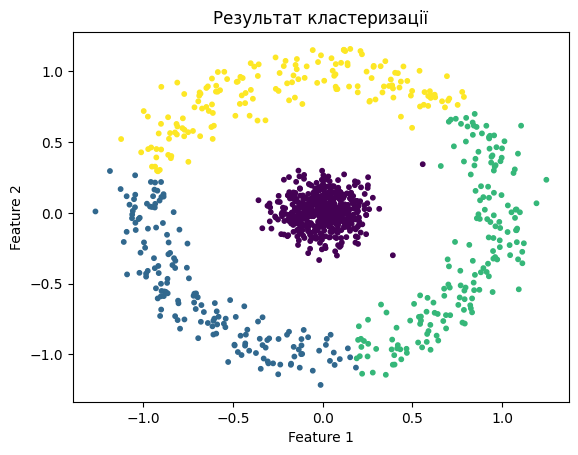


Модель 3:
Adjusted Rand Index: 0.6637
Silhouette Coefficient: 0.5423
Davies-Bouldin Index: 0.8043


In [11]:
from sklearn.metrics.pairwise import rbf_kernel
alt_models = [
    SpectralClustering(n_clusters=2, affinity='rbf', random_state=0),
    SpectralClustering(n_clusters=2, affinity='precomputed', random_state=0),
    SpectralClustering(n_clusters=4, affinity='rbf', random_state=0)
]
# Обчислення матриці подібностей для 'precomputed'
similarity_matrix = rbf_kernel(X_scaled)

for i, model in enumerate(alt_models, start=1):
    if model.affinity == 'precomputed':
        labels = model.fit_predict(similarity_matrix)
    else:
        labels = model.fit_predict(X_scaled)
    ari = adjusted_rand_score(y, labels)
    silhouette = silhouette_score(X_scaled, labels)
    db_index = davies_bouldin_score(X_scaled, labels)
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=10)
    plt.title("Результат кластеризації")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()
    print(f"\nМодель {i}:")
    print(f"Adjusted Rand Index: {ari:.4f}")
    print(f"Silhouette Coefficient: {silhouette:.4f}")
    print(f"Davies-Bouldin Index: {db_index:.4f}")

Модель 1 ідеально відтворює істинний розподіл (високий ARI), але має значні проблеми з просторовою якістю кластерів.

Модель 2 краще виконує просторове розділення кластерів, але погано відповідає істинним даним (низький ARI).

Модель 3 є найкращою за балансом просторової якості (SC, DBI) і відповідності істинному розподілу (ARI).

### 8) Виконати аналiз результатiв кластеризацiї одним з неформальних методiв (тiльки методом згiдно з варiантом): чи є розбиття стабiльним пiсля видалення окремих об’єктiв

In [11]:
np.random.seed(42)
scaler = StandardScaler()
indices = np.random.choice(len(X_scaled), size=int(len(X_scaled) * 0.8), replace=False)
X2 = X_scaled[indices]
#X2_scaled = scaler.fit_transform(X2)
y2 = y[indices]
y2_pred=spectral.fit_predict(X2)
print(adjusted_rand_score(y2,y2_pred))

0.9947565628915646


In [7]:
print(adjusted_rand_score(y,y_pred))

0.9938093004525199


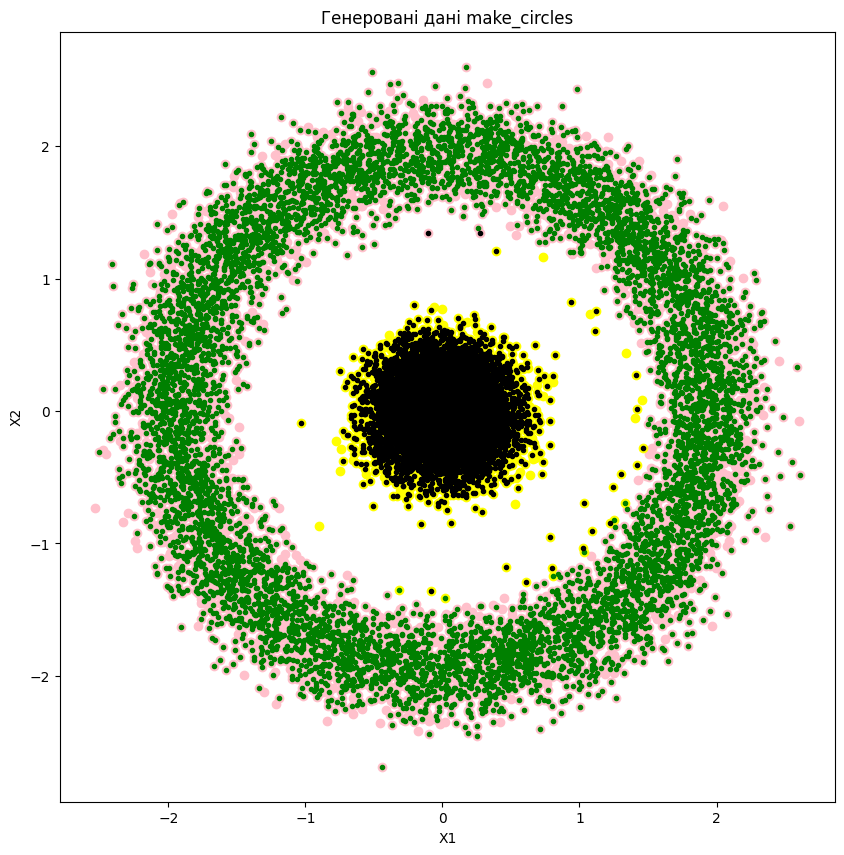

In [13]:
plt.figure(figsize=(10,10))
plt.scatter(X_scaled[y_pred==0,0],X_scaled[y_pred==0,1], color='pink', label='class 0')
plt.scatter(X_scaled[y_pred==1,0],X_scaled[y_pred==1,1], color='yellow', label='class 1')
plt.scatter(X2[y2_pred==0,0],X2[y2_pred==0,1], marker='.', color='green')
plt.scatter(X2[y2_pred==1,0],X2[y2_pred==1,1], marker='.', color='black')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Генеровані дані make_circles')
plt.show()

### Як можна бачити кластери співпадають вельми точно